<a href="https://colab.research.google.com/github/Sandhiya-GD/Urban-Trip-fare-prediction/blob/main/Urban_Trip_fare_prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import pandas as pd
df=pd.read_csv('/content/taxi_fare.csv')

In [8]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1.0,N,-74.004265,40.746128,1.0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1.0,N,-74.005943,40.733166,1.0,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1.0,N,-73.974541,40.675770,1.0,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1.0,N,-73.969650,40.757767,1.0,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3.0,N,-74.177170,40.695053,1.0,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81998,2,2016-03-01 01:53:46,2016-03-01 02:05:55,1,-73.97073364257811,40.758324,1.0,N,-74.004166,40.716148,1.0,12.5,0.5,0.5,4.14,0.00,0.3,17.94
81999,1,2016-03-01 01:53:47,2016-03-01 02:08:17,1,-73.99126434326173,40.727600,1.0,N,-73.965897,40.677155,1.0,15.0,0.5,0.5,2.00,0.00,0.3,18.30
82000,1,2016-03-01 01:53:49,2016-03-01 01:56:47,1,-74.00279235839844,40.728519,1.0,N,-73.996391,40.742565,1.0,5.0,0.5,0.5,1.55,0.00,0.3,7.85
82001,2,2016-03-01 01:53:49,2016-03-01 02:35:20,1,-74.00070953369139,40.729580,1.0,N,-73.884537,40.845329,2.0,45.5,0.5,0.5,0.00,0.00,0.3,46.80


In [9]:
#Data understanding
df.shape

(82003, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82003 entries, 0 to 82002
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               82003 non-null  int64  
 1   tpep_pickup_datetime   82003 non-null  object 
 2   tpep_dropoff_datetime  82003 non-null  object 
 3   passenger_count        82003 non-null  int64  
 4   pickup_longitude       82003 non-null  object 
 5   pickup_latitude        82002 non-null  float64
 6   RatecodeID             82002 non-null  float64
 7   store_and_fwd_flag     82002 non-null  object 
 8   dropoff_longitude      82002 non-null  float64
 9   dropoff_latitude       82002 non-null  float64
 10  payment_type           82002 non-null  float64
 11  fare_amount            82002 non-null  float64
 12  extra                  82002 non-null  float64
 13  mta_tax                82002 non-null  float64
 14  tip_amount             82002 non-null  float64
 15  to

In [11]:
df.describe()

,VendorID,passenger_count,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,82003.000000,82003.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000,82002.000000
mean,1.936746,1.975098,40.399562,1.034731,-73.342301,40.404022,1.323895,13.006143,0.064187,0.497409,1.868740,0.340337,0.299521,16.076317
std,0.243420,1.617480,3.778404,0.264183,6.814548,3.751953,0.473636,11.388499,0.168145,0.040076,2.554769,1.461663,0.016121,14.050622
min,1.000000,0.000000,0.000000,1.000000,-121.933296,0.000000,1.000000,-25.500000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-25.800000
25%,2.000000,1.000000,40.739785,1.000000,-73.990837,40.739236,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,40.755713,1.000000,-73.978867,40.755131,1.000000,9.500000,0.000000,0.500000,1.360000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,40.769661,1.000000,-73.964256,40.767547,2.000000,15.000000,0.000000,0.500000,2.460000,0.000000,0.300000,17.760000
max,2.000000,6.000000,41.204548,6.000000,0.000000,42.666893,4.000000,819.500000,4.500000,0.500000,125.880000,25.540000,0.300000,832.800000


In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [14]:
import math

In [15]:
from math import radians, sin, cos, asin, sqrt
import pandas as pd

# Haversine distance function
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points on Earth (in miles)
    using the Haversine formula
    """
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))

    # Radius of Earth in miles
    r = 3963
    return c * r

In [17]:
# Feature engineering function
def feature_engineering(df):
    """
    Create new features from existing columns
    """
    print("🔧 Starting Feature Engineering...")
    data_clean = df.copy()

    # Convert longitude columns to numeric, coercing errors to NaN
    data_clean['pickup_longitude'] = pd.to_numeric(data_clean['pickup_longitude'], errors='coerce')
    data_clean['dropoff_longitude'] = pd.to_numeric(data_clean['dropoff_longitude'], errors='coerce')

    # Fill NaN values in longitude and latitude columns with 0
    data_clean['pickup_longitude'].fillna(0, inplace=True)
    data_clean['pickup_latitude'].fillna(0, inplace=True)
    data_clean['dropoff_longitude'].fillna(0, inplace=True)
    data_clean['dropoff_latitude'].fillna(0, inplace=True)


    # Calculate trip distance using Haversine formula
    print("📏 Calculating trip distances...")
    data_clean['trip_distance_calculated'] = data_clean.apply(
        lambda row: haversine_distance(
            row['pickup_longitude'], row['pickup_latitude'],
            row['dropoff_longitude'], row['dropoff_latitude']
        ), axis=1
    )

    print("✅ Feature engineering completed!")
    print(f"📊 New dataset shape: {data_clean.shape}")

    return data_clean

# Example usage:
# df_engineered will have all new features
df_engineered = feature_engineering(df)

# Now use df_engineered instead of data_clean
print(df_engineered.columns)

# If you want to replace the original dataset:
data = df_engineered.copy()

🔧 Starting Feature Engineering...
📏 Calculating trip distances...
✅ Feature engineering completed!
📊 New dataset shape: (82003, 19)
Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_calculated'],
      dtype='object')


In [18]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')
df['trip_duration_calculated'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [19]:
# Add trip_duration_calculated to the data DataFrame
data['trip_duration_calculated'] = df['trip_duration_calculated']

# Displaying the first few rows to check the conversion and the new column
data[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance_calculated','trip_duration_calculated']].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance_calculated,trip_duration_calculated
0,2016-03-01 00:00:00,2016-03-01 00:07:55,1.952013,7.916667
1,2016-03-01 00:00:00,2016-03-01 00:11:06,2.676833,11.100000
2,2016-03-01 00:00:00,2016-03-01 00:31:06,10.325908,31.100000
3,2016-03-01 00:00:00,2016-03-01 00:00:00,5.627290,0.000000
4,2016-03-01 00:00:00,2016-03-01 00:00:00,12.689576,0.000000


In [20]:
print(f"Columns: {list(df.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_duration_calculated']


In [21]:
# Pickup time feature
df['pickup_year'] = df['tpep_pickup_datetime'].dt.year
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_weekday_name'] = df['tpep_pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

In [22]:
# Dropoff time features
df['dropoff_year'] = df['tpep_dropoff_datetime'].dt.year
df['dropoff_month'] = df['tpep_dropoff_datetime'].dt.month
df['dropoff_weekday_name'] = df['tpep_dropoff_datetime'].dt.day_name()
df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

In [23]:
print(f"Columns: {list(df.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_duration_calculated', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour']


In [24]:
df['pickup_weekday_name'].unique()

array(['Tuesday', 'Thursday'], dtype=object)

In [25]:
df['dropoff_weekday_name'].nunique()

4

In [26]:
# Weekend indicator
# df['is_weekend'] = (df['pickup_weekday'] >= 4).astype(int)
# This is will not work as the given Dataset has been available for these weekdays monday, tuesday and thursday which falls in weekdays.

In [27]:
# AM/PM indicator
df['is_pm'] = (df['pickup_hour'] >= 12).astype(int)
df['is_pm'] = (df['dropoff_hour'] >= 12).astype(int)

In [28]:
# Night ride indicator (10 PM to 6 AM)
df['is_night'] = ((df['pickup_hour'] >= 22) | (df['pickup_hour'] <= 6)).astype(int)
df['is_night'] = ((df['dropoff_hour'] >= 22) | (df['dropoff_hour'] <= 6)).astype(int)

In [29]:
# Rush hour indicators
df['is_morning_rush'] = ((df['pickup_hour'] >= 7) & (df['pickup_hour'] <= 9)).astype(int)
df['is_evening_rush'] = ((df['pickup_hour'] >= 17) & (df['pickup_hour'] <= 19)).astype(int)
df['is_morning_rush'] = ((df['dropoff_hour'] >= 7) & (df['dropoff_hour'] <= 9)).astype(int)
df['is_evening_rush'] = ((df['dropoff_hour'] >= 17) & (df['dropoff_hour'] <= 19)).astype(int)

In [30]:
# Fare per mile and fare per minute
# df['fare_per_mile'] = df['fare_amount'] / (df['trip_distance_calculated'] + 1e-8)
# df['fare_per_minute'] = df['fare_amount'] / (df['trip_duration_minutes'] + 1e-8)

In [31]:
# Speed (miles per hour)
# df['speed_mph'] = (df['trip_distance_calculated'] * 60) / (df['trip_duration_minutes'] + 1e-8)

In [32]:
# Passenger density feature
# df['fare_per_passenger'] = df['fare_amount'] / (df['passenger_count'] + 1e-8)

In [33]:
print(f"Columns: {list(df.columns)}")

Columns: ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'trip_duration_calculated', 'pickup_year', 'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year', 'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm', 'is_night', 'is_morning_rush', 'is_evening_rush']


In [34]:
df.shape

(82003, 31)

In [35]:
df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag','fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount', 'improvement_surcharge'], axis=1, inplace=True)

In [36]:
# Data types
print("🔍 DATA TYPES:")
print(df.dtypes)
print("-" * 40)  # separator line
print(df.shape)

🔍 DATA TYPES:
VendorID                      int64
passenger_count               int64
pickup_longitude             object
pickup_latitude             float64
RatecodeID                  float64
dropoff_longitude           float64
dropoff_latitude            float64
payment_type                float64
total_amount                float64
trip_duration_calculated    float64
pickup_year                   int32
pickup_month                  int32
pickup_weekday_name          object
pickup_hour                   int32
dropoff_year                  int32
dropoff_month                 int32
dropoff_weekday_name         object
dropoff_hour                  int32
is_pm                         int64
is_night                      int64
is_morning_rush               int64
is_evening_rush               int64
dtype: object
----------------------------------------
(82003, 22)


In [37]:
print(df.isnull().sum())
print("-" * 40)  # separator line
print(df.isna().sum())

VendorID                    0
passenger_count             0
pickup_longitude            0
pickup_latitude             1
RatecodeID                  1
dropoff_longitude           1
dropoff_latitude            1
payment_type                1
total_amount                1
trip_duration_calculated    0
pickup_year                 0
pickup_month                0
pickup_weekday_name         0
pickup_hour                 0
dropoff_year                0
dropoff_month               0
dropoff_weekday_name        0
dropoff_hour                0
is_pm                       0
is_night                    0
is_morning_rush             0
is_evening_rush             0
dtype: int64
----------------------------------------
VendorID                    0
passenger_count             0
pickup_longitude            0
pickup_latitude             1
RatecodeID                  1
dropoff_longitude           1
dropoff_latitude            1
payment_type                1
total_amount                1
trip_duration_ca

In [38]:
data.duplicated().sum()

np.int64(0)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")
# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)

🎯 Analyzing target variable distribution...


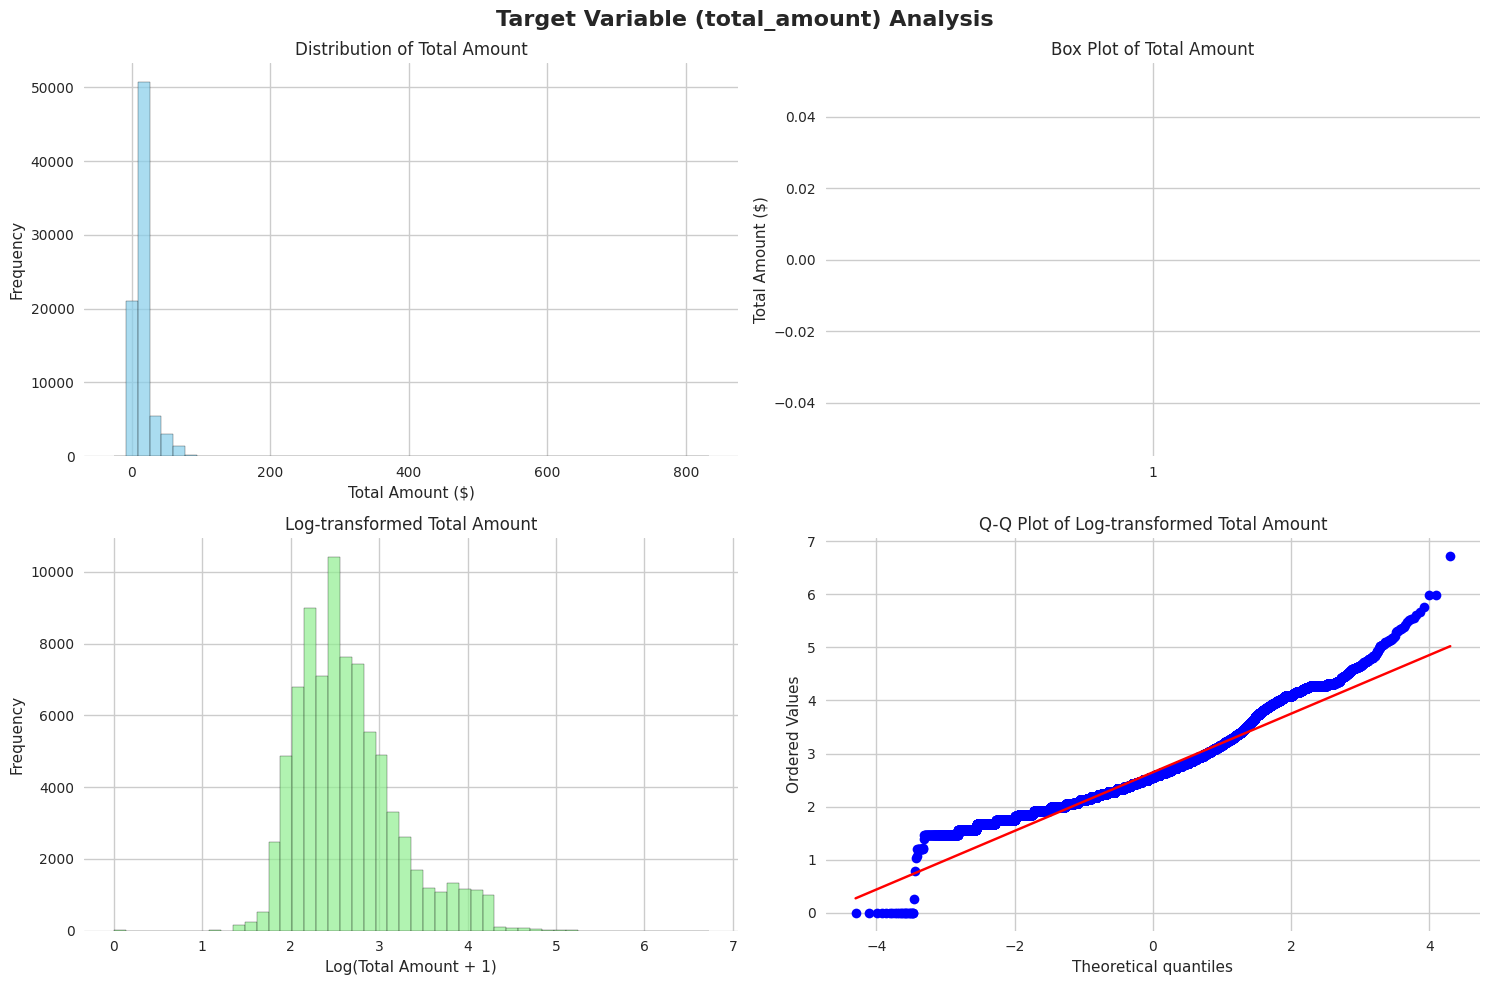

In [40]:
#Target variable distribution
print("🎯 Analyzing target variable distribution...")
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Target Variable (total_amount) Analysis', fontsize=16, fontweight='bold')
 # Histogram
axes[0,0].hist(df['total_amount'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of Total Amount')
axes[0,0].set_xlabel('Total Amount ($)')
axes[0,0].set_ylabel('Frequency')

# Box plot
axes[0,1].boxplot(df['total_amount'])
axes[0,1].set_title('Box Plot of Total Amount')
axes[0,1].set_ylabel('Total Amount ($)')

# Log transformation - handle non-positive values
import numpy as np
log_total = np.log1p(df['total_amount'][df['total_amount'] > -1])
axes[1,0].hist(log_total, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].set_title('Log-transformed Total Amount')
axes[1,0].set_xlabel('Log(Total Amount + 1)')
axes[1,0].set_ylabel('Frequency')

# Q-Q plot of log-transformed data
import scipy.stats as stats
stats.probplot(log_total, dist="norm", plot=axes[1,1])
axes[1,1].set_title('Q-Q Plot of Log-transformed Total Amount')

plt.tight_layout()
plt.show()

In [41]:
# Both the log-transformed histogram and the Q-Q plot are used to check and improve the normality of total_amount,
# which helps meet assumptions for many statistical models and reduces skewness for better predictive performance.


In [42]:
# # 2. Correlation analysis
# print("🔗 Analyzing correlations...")
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# correlation_matrix = df[numeric_cols].corr()

# plt.figure(figsize=(14, 10))
# mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
#             center=0, square=True, fmt='.2f')
# plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
# plt.tight_layout()
# plt.show()

In [43]:
#Univariate Analysis (Single Variable) - Histogram & Count plot
df.columns

Index(['VendorID', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'RatecodeID', 'dropoff_longitude', 'dropoff_latitude', 'payment_type',
       'total_amount', 'trip_duration_calculated', 'pickup_year',
       'pickup_month', 'pickup_weekday_name', 'pickup_hour', 'dropoff_year',
       'dropoff_month', 'dropoff_weekday_name', 'dropoff_hour', 'is_pm',
       'is_night', 'is_morning_rush', 'is_evening_rush'],
      dtype='object')

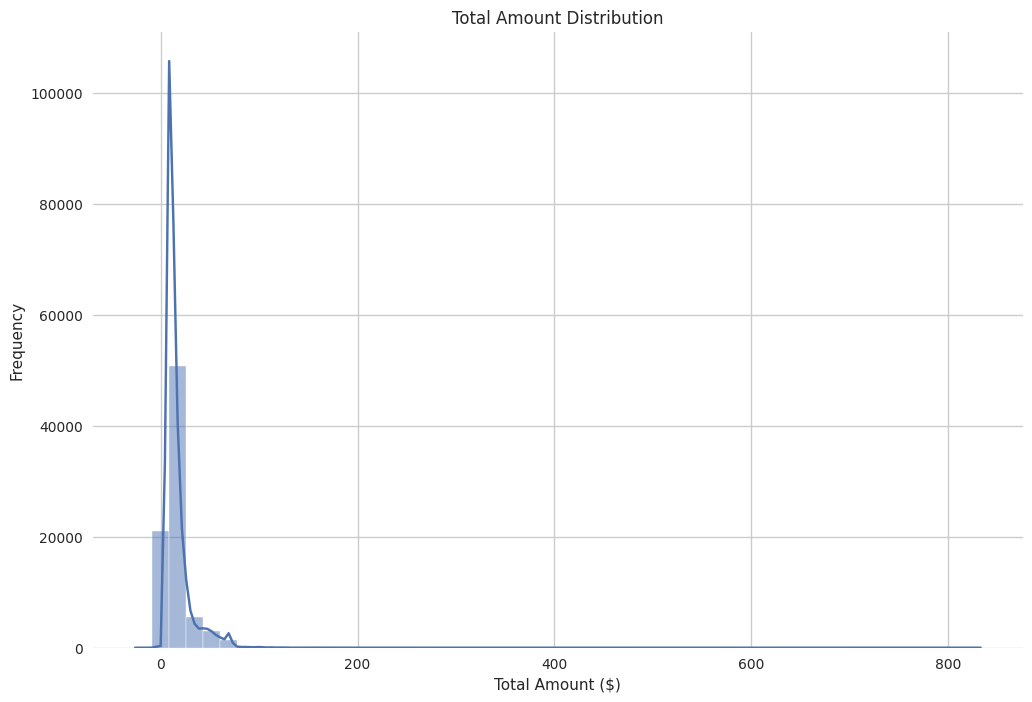

In [44]:
# Total amount distribution
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Total Amount Distribution")
plt.xlabel("Total Amount ($)")
plt.ylabel("Frequency")
plt.show()

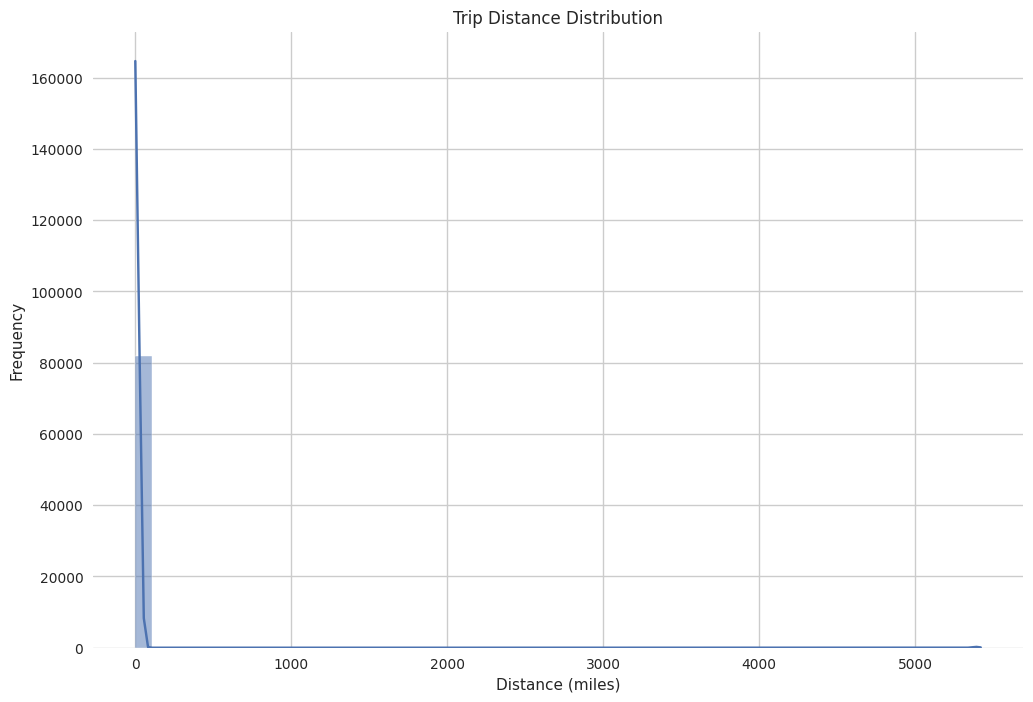

In [45]:
# Trip distance distribution
sns.histplot(data['trip_distance_calculated'], bins=50, kde=True)
plt.title("Trip Distance Distribution")
plt.xlabel("Distance (miles)")
plt.ylabel("Frequency")
plt.show()

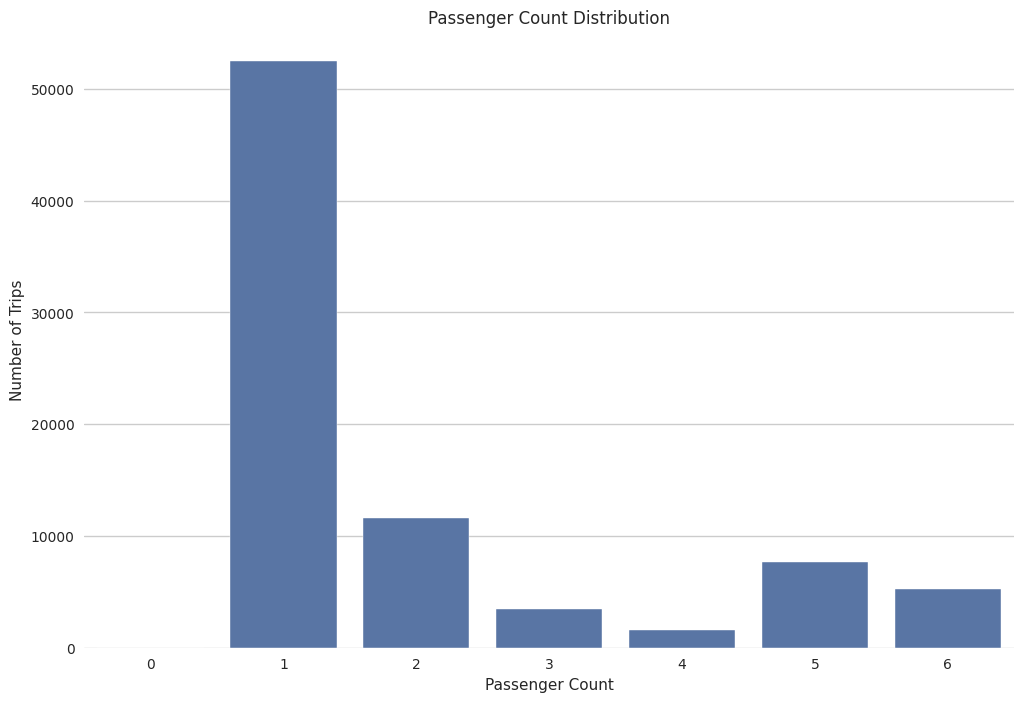

In [46]:
# Passenger count distribution
sns.countplot(x='passenger_count', data=data)
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()

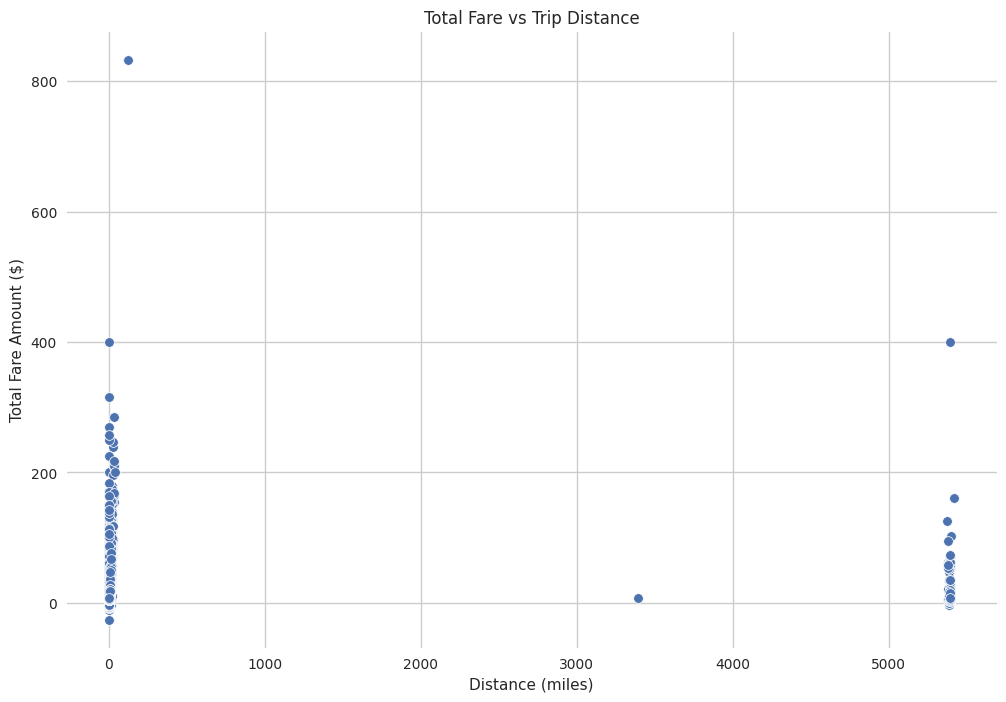

In [47]:
#Bivariate Analysis (Relationships Between Variables)
# Fare vs Distance
sns.scatterplot(x='trip_distance_calculated', y='total_amount', data=data)
plt.title("Total Fare vs Trip Distance")
plt.xlabel("Distance (miles)")
plt.ylabel("Total Fare Amount ($)")
plt.show()

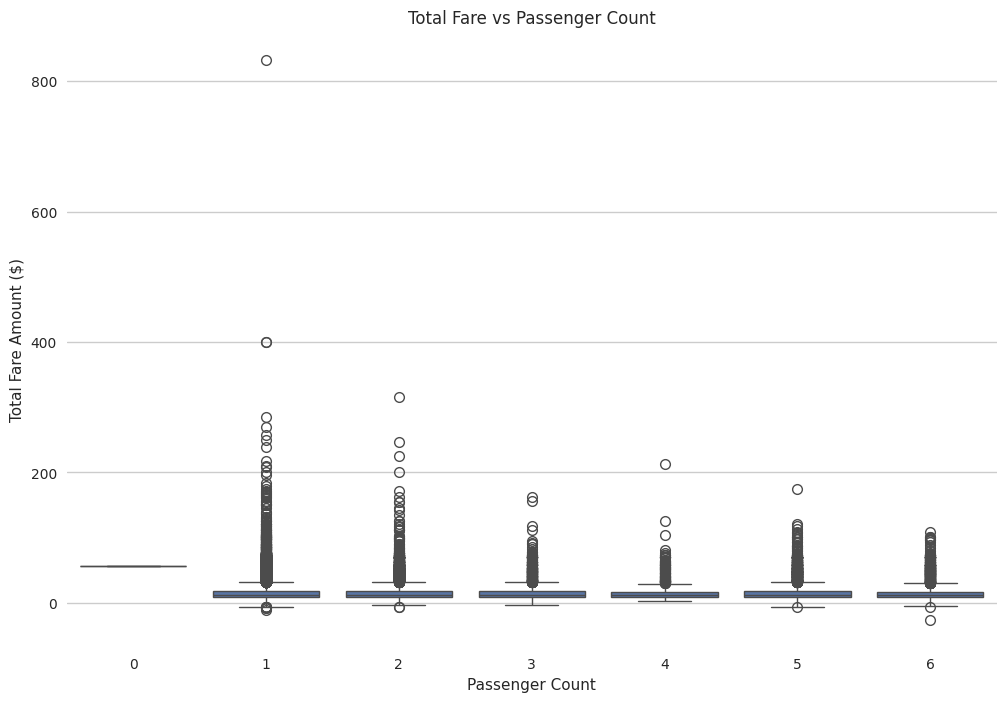

In [48]:
# Fare vs Passenger Count
sns.boxplot(x='passenger_count', y='total_amount', data=data)
plt.title("Total Fare vs Passenger Count")
plt.xlabel("Passenger Count")
plt.ylabel("Total Fare Amount ($)")
plt.show()

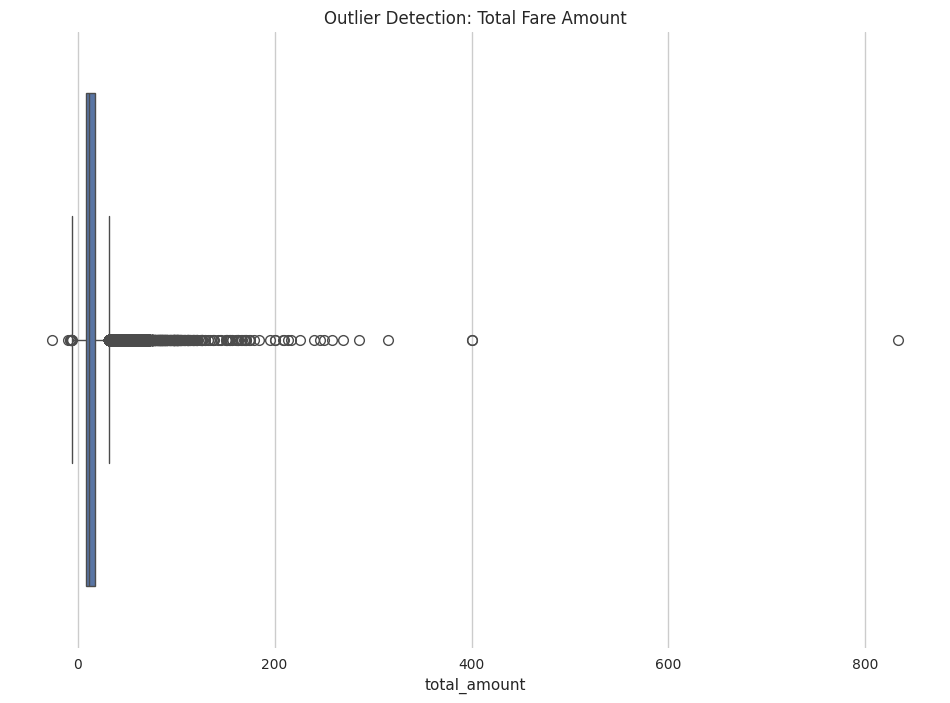

In [49]:
#Outlier Detection
# Boxplots for outlier detection
sns.boxplot(x=data['total_amount'])
plt.title("Outlier Detection: Total Fare Amount")
plt.show()

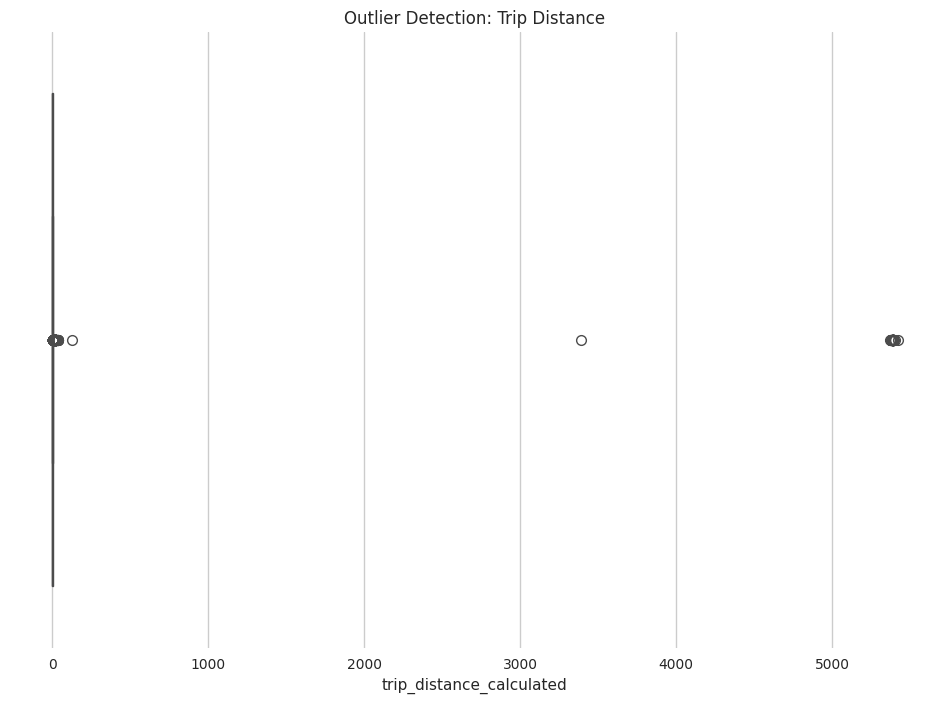

In [50]:
sns.boxplot(x=data['trip_distance_calculated'])
plt.title("Outlier Detection: Trip Distance")
plt.show()

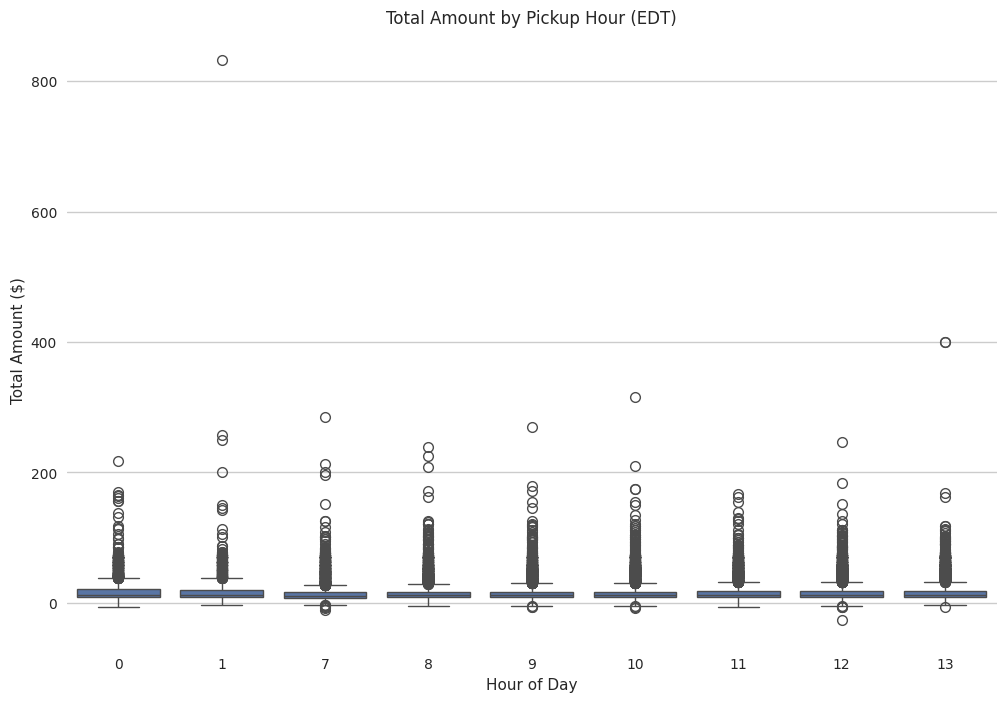

In [51]:
#Time-based Analysis
# Fare by hour of day
sns.boxplot(x='pickup_hour', y='total_amount', data=df)
plt.title("Total Amount by Pickup Hour (EDT)")
plt.xlabel("Hour of Day")
plt.ylabel("Total Amount ($)")
plt.show()

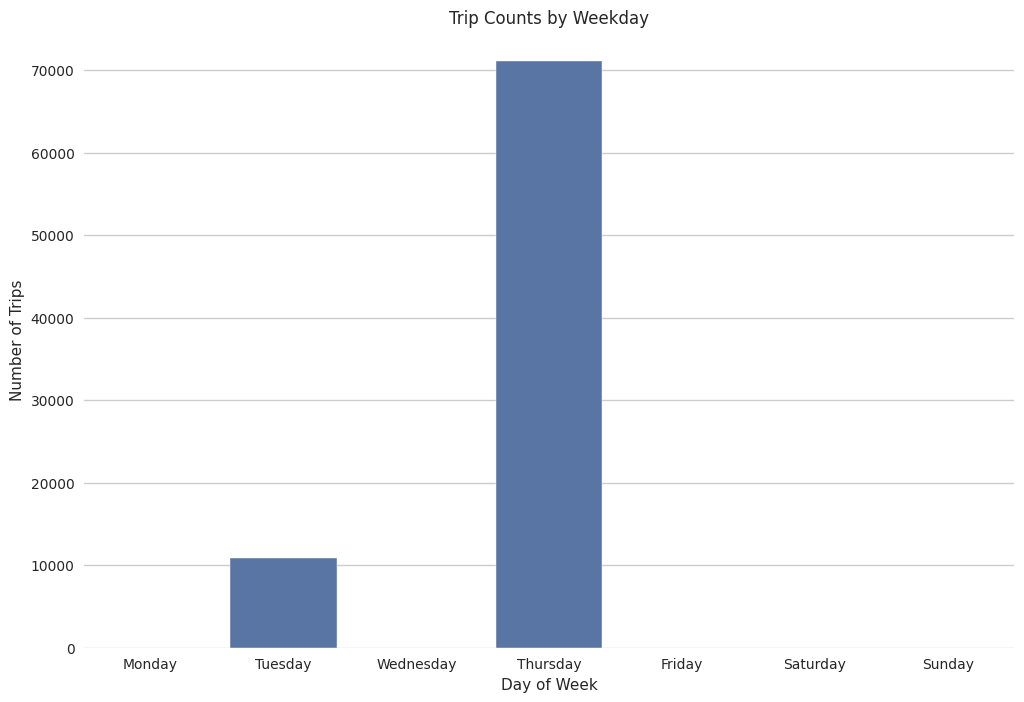

In [52]:
# Trip count by weekday
sns.countplot(x='pickup_weekday_name', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Trip Counts by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Number of Trips")
plt.show()

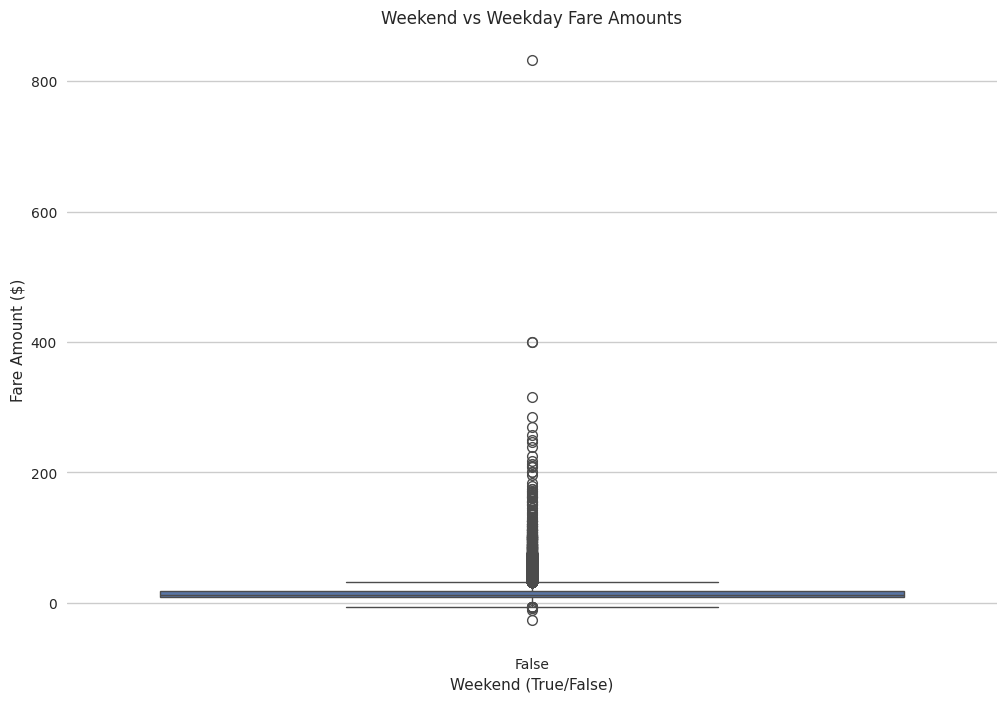

In [53]:
# Weekday vs Weekend
df['is_weekend'] = df['pickup_weekday_name'].isin(['Saturday', 'Sunday'])
sns.boxplot(x='is_weekend', y='total_amount', data=df)
plt.title("Weekend vs Weekday Fare Amounts")
plt.xlabel("Weekend (True/False)")
plt.ylabel("Fare Amount ($)")
plt.show()

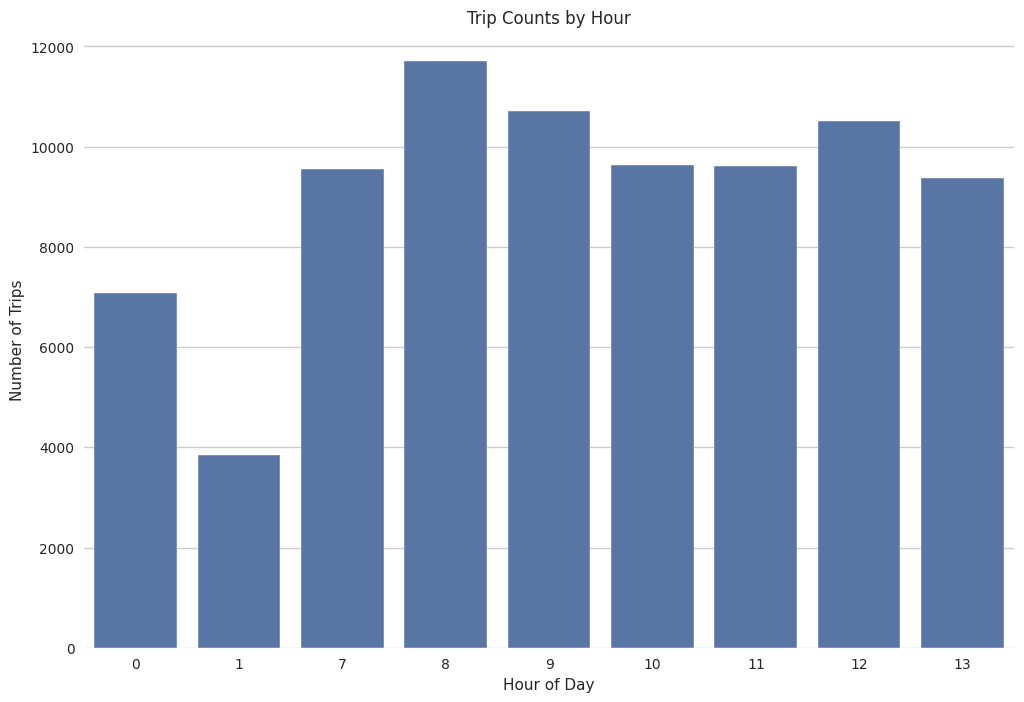

In [54]:
# Trip count by pickup hour
sns.countplot(x='pickup_hour', data=df)
plt.title("Trip Counts by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.show()

In [55]:
#Fare Per Mile & Fare Per Minute
# Create new fare metrics
data['fare_per_mile'] = data['total_amount'] / data['trip_distance_calculated']
data['fare_per_minute'] = data['total_amount'] / data['trip_duration_calculated']

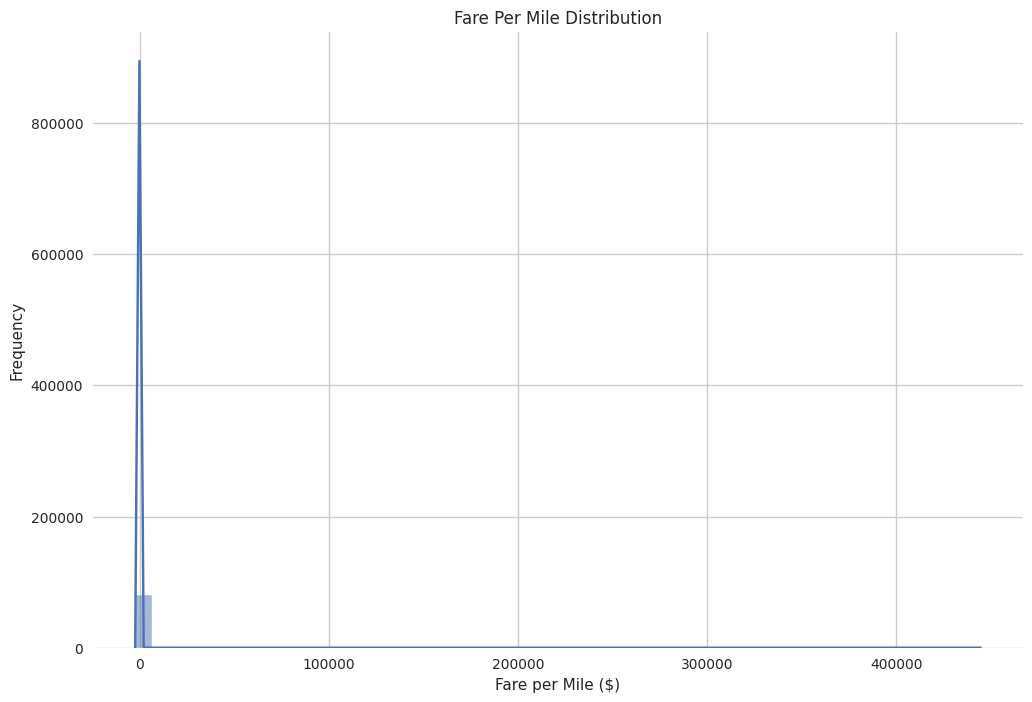

In [56]:
# Visualize
sns.histplot(data['fare_per_mile'], bins=50, kde=True)
plt.title("Fare Per Mile Distribution")
plt.xlabel("Fare per Mile ($)")
plt.ylabel("Frequency")
plt.show()

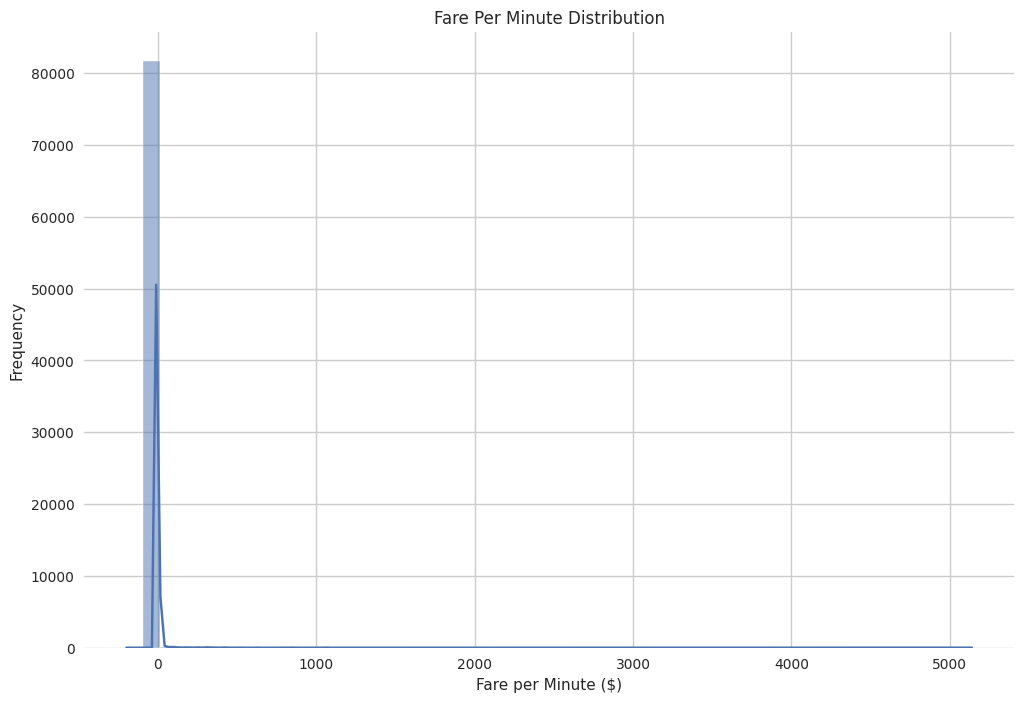

In [57]:
sns.histplot(data['fare_per_minute'], bins=50, kde=True)
plt.title("Fare Per Minute Distribution")
plt.xlabel("Fare per Minute ($)")
plt.ylabel("Frequency")
plt.show()

In [61]:
target = 'total_amount'

feature_cols = [
    'passenger_count','RatecodeID','payment_type',
    'pickup_hour','is_weekend','is_night','VendorID'
]

feature_cols = [c for c in feature_cols if c in df.columns]

X = df[feature_cols].copy()
y = df[target].copy()

# Identify categorical vs numeric
cat_cols = [c for c in X.columns if X[c].dtype == 'object']
# Ensure flags are treated as categorical if present
for c in []:
    if c in X.columns and c not in cat_cols:
        cat_cols.append(c)
num_cols = [c for c in X.columns if c not in cat_cols]

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols)
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((65602, 7), (16401, 7))

In [62]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=20000),
    "RandomForest": RandomForestRegressor(n_estimators=300, random_state=42, n_jobs=-1),
    "GradientBoosting": GradientBoostingRegressor(random_state=42)
}

results = []
fitted_models = {}

# Handle missing values in the target variable
train_data = pd.concat([X_train, y_train], axis=1)
train_data.dropna(subset=[target], inplace=True)
X_train_cleaned = train_data.drop(columns=[target])
y_train_cleaned = train_data[target]


for name, model in models.items():
    pipe = Pipeline(steps=[("preprocess", preprocess), ("model", model)])
    pipe.fit(X_train_cleaned, y_train_cleaned)
    preds = pipe.predict(X_test)
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE
    mae = mean_absolute_error(y_test, preds)
    results.append({"model": name, "R2": r2, "RMSE": rmse, "MAE": mae})
    fitted_models[name] = pipe

results_df = pd.DataFrame(results).sort_values(by="RMSE")
results_df

,model,R2,RMSE,MAE
4,GradientBoosting,0.415545,10.795197,6.873328
3,RandomForest,0.412865,10.819922,6.868639
0,LinearRegression,0.354025,11.349142,7.412072
1,Ridge,0.354024,11.349149,7.412085
2,Lasso,0.354022,11.349171,7.412160


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# Get the best model name safely
best_base = results_df.loc[0, 'model'] if 'model' in results_df.columns else None
print("Best (base) model:", best_base)

# Define parameter grids and base models
if best_base == "RandomForest":
    param_distributions = {
        "model__n_estimators": [200, 300, 400, 600],
        "model__max_depth": [None, 8, 12, 16, 24],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
        "model__max_features": ["sqrt", 0.5, 0.8]
    }
    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)

elif best_base == "GradientBoosting":
    param_distributions = {
        "model__n_estimators": [100, 200, 300],
        "model__learning_rate": [0.03, 0.05, 0.1],
        "model__max_depth": [2, 3, 4],
        "model__subsample": [0.7, 0.8, 1.0],
        "model__min_samples_split": [2, 5, 10]
    }
    base_model = GradientBoostingRegressor(random_state=42)

elif best_base == "Ridge":
    param_distributions = {
        "model__alpha": [0.1, 0.5, 1.0, 5.0, 10.0]
    }
    base_model = Ridge()

elif best_base == "Lasso":
    param_distributions = {
        "model__alpha": [0.0005, 0.001, 0.005, 0.01]
    }
    base_model = Lasso(max_iter=30000)

else:
    param_distributions = {}
    base_model = LinearRegression()

# Build pipeline
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", base_model)
])

# Train with or without tuning
if param_distributions:
    search = RandomizedSearchCV(
        pipe,
        param_distributions=param_distributions,
        n_iter=min(12, sum(len(v) for v in param_distributions.values())) if param_distributions else 0, # Ensure n_iter is not greater than possible combinations
        scoring="neg_root_mean_squared_error",
        cv=3,
        verbose=1,
        random_state=42,
        n_jobs=-1
    )
    # Use cleaned data for tuning
    search.fit(X_train_cleaned, y_train_cleaned)
    best_model = search.best_estimator_
    print("Best params:", search.best_params_)
else:
    # Use cleaned data for fitting when no tuning
    best_model = pipe.fit(X_train_cleaned, y_train_cleaned)

# Evaluate
preds = best_model.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, preds)
mae = mean_absolute_error(y_test, preds)

print({"R2": r2, "RMSE": rmse, "MAE": mae})

Best (base) model: LinearRegression
{'R2': 0.3540248590576336, 'RMSE': np.float64(11.34914176860439), 'MAE': 7.412072081650595}


In [64]:
from pathlib import Path
import joblib

artifacts_dir = Path("artifacts")
artifacts_dir.mkdir(exist_ok=True)

MODEL_PATH = artifacts_dir / "tripfare_best_model.joblib"
joblib.dump(best_model, MODEL_PATH)
print("Saved model to:", MODEL_PATH.resolve())

Saved model to: /content/artifacts/tripfare_best_model.joblib


In [65]:

def predict_fare(best_model, pickup_lat, pickup_lon, dropoff_lat, dropoff_lon, passenger_count, pickup_dt_local):
    # Ensure tz-aware Eastern time
    if isinstance(pickup_dt_local, str):
        pickup_dt_local = pd.Timestamp(pickup_dt_local)
    if pickup_dt_local.tzinfo is None:
        pickup_dt_local = pickup_dt_local.tz_localize('US/Eastern')
    else:
        pickup_dt_local = pickup_dt_local.tz_convert('US/Eastern')

    hour = pickup_dt_local.hour
    dayofweek = pickup_dt_local.dayofweek
    is_weekend = int(dayofweek in [5,6])
    am_pm = 'AM' if hour < 12 else 'PM'
    is_night = int(hour in [0,1,2,3,4,23])
    is_rush = int(hour in [7,8,9,16,17,18])

    # Distance & a simple duration proxy at prediction time
    def haversine_km(lat1, lon1, lat2, lon2):
        R = 6371.0
        lat1_rad = math.radians(lat1)
        lat2_rad = math.radians(lat2)
        dlat = lat2_rad - lat1_rad
        dlon = math.radians(lon2 - lon1)
        a = math.sin(dlat/2.0)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2.0)**2
        c = 2 * math.asin(math.sqrt(a))
        return R * c

    dist_km = haversine_km(pickup_lat, pickup_lon, dropoff_lat, dropoff_lon)
    duration_min = max(1.0, dist_km * 3.0)

    row = {
        'fare_amount': 0.0,
        'extra': 0.0,
        'mta_tax': 0.5,
        'tip_amount': 0.0,
        'tolls_amount': 0.0,
        'improvement_surcharge': 0.3,
        'passenger_count': passenger_count,
        'RatecodeID': 1,
        'payment_type': 1,
        'trip_distance_km': dist_km,
        'trip_duration_min': duration_min,
        'pickup_hour': hour,
        'pickup_dayofweek': dayofweek,
        'is_weekend': is_weekend,
        'is_night': is_night,
        'is_rush_hour': is_rush,
        'VendorID': 1,
        'store_and_fwd_flag': 'N',
        'am_pm': am_pm
    }
    # filter to model columns if necessary
    cols = [c for c in row.keys() if c in best_model.named_steps['preprocess'].feature_names_in_]
    X = pd.DataFrame([row])[cols]
    return float(best_model.predict(X)[0])

# Quick smoke test with dummy coordinates (within NYC)
try:
    sample_pred = predict_fare(
        best_model,
        pickup_lat=40.758, pickup_lon=-73.985,  # Times Sq
        dropoff_lat=40.7128, dropoff_lon=-74.0060,  # Lower Manhattan
        passenger_count=1,
        pickup_dt_local="2021-07-02 18:30:00"
    )
    print("Sample predicted fare:", round(sample_pred, 2))
except Exception as e:
    print("Prediction test failed:", e)


Sample predicted fare: 19.5


In [66]:
!pip install streamlit

In [71]:
#streamlit_app.py
%%writefile tripfare.py
import streamlit as st
import pandas as pd
import joblib
from datetime import datetime
import numpy as np

# -----------------
# Load trained model
# -----------------
@st.cache_resource
def load_model():
    return joblib.load("artifacts/tripfare_best_model.joblib")

model = load_model()

# -----------------
# App title
# -----------------
st.set_page_config(page_title="TripFare Prediction", page_icon="🚕", layout="centered")
st.title("🚕 Urban Trip Fare Prediction")
st.markdown("Enter trip details to estimate the **total fare**.")

# -----------------
# Input form
# -----------------
with st.form("fare_form"):
    pickup_datetime = st.date_input("Pickup Date", value=datetime(2025, 8, 13))
    pickup_time = st.time_input("Pickup Time", value=datetime.now().time())
    passenger_count = st.number_input("Passenger Count", min_value=1, max_value=8, value=1, step=1)

    pickup_lat = st.number_input("Pickup Latitude", value=40.7614327, format="%.6f")
    pickup_lon = st.number_input("Pickup Longitude", value=-73.9798156, format="%.6f")
    dropoff_lat = st.number_input("Dropoff Latitude", value=40.6513111, format="%.6f")
    dropoff_lon = st.number_input("Dropoff Longitude", value=-73.8803331, format="%.6f")

    submitted = st.form_submit_button("Predict Fare 💰")

# -----------------
# Prediction
# -----------------
if submitted:
    # Combine date + time
    pickup_dt = datetime.combine(pickup_datetime, pickup_time)

    # Build a DataFrame with required features
    input_df = pd.DataFrame([{
        "pickup_datetime": pickup_dt,
        "pickup_latitude": pickup_lat,
        "pickup_longitude": pickup_lon,
        "dropoff_latitude": dropoff_lat,
        "dropoff_longitude": dropoff_lon,
        "passenger_count": passenger_count
    }])

    # Predict
    try:
        fare_pred = model.predict(input_df)[0]
        st.success(f"Estimated Fare: **${fare_pred:,.2f}**")
    except Exception as e:
        st.error(f"Prediction error: {e}")


Overwriting tripfare.py


In [68]:
!pip install streamlit pandas joblib


In [69]:
!wget -q -O - ipv4.icanhazip.com

34.148.222.140


In [ ]:
!streamlit run tripfare.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.148.222.140:8501

⠴⠦⠧⠇⠏⠋⠙your url is: https://yellow-wasps-divide.loca.lt
